In [178]:
import os
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [179]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0,rpath)
from src.plots import Plot
from src.preprocessing import PreProcess

In [180]:
df = pd.read_csv('../data/cleaned_data_outliers.csv')

In [181]:
column_name = 'msisdn/number'
value_to_match = 33663706799.0
mask = df[column_name] == value_to_match
df = df[~mask]

In [182]:
df.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,14.416352,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,16.578971,14.732334,15.919515,16.083116,19.443428,16.478853,18.961518,15.991897,17.419642,19.548462
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,14.126741,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,16.823537,16.765813,16.724508,16.661996,20.226918,13.973120,20.082529,16.527230,17.800791,20.297677
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,14.124290,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,16.797431,16.503329,16.682716,15.634140,19.251782,12.888235,19.833356,15.254341,17.143551,19.449612
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,14.094285,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,16.878346,16.533289,16.454185,13.908948,20.499545,16.199650,20.434303,16.364743,17.584222,20.556064
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,13.900779,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,16.540705,16.757994,16.656025,12.936559,20.084052,15.076752,20.126718,16.448142,17.467280,20.159635


In [183]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


In [184]:
df['avg_tcp_retrans'] = df['tcp_dl_retrans._vol_(bytes)'] + df['tcp_ul_retrans._vol_(bytes)']
df['avg_rrt'] = df['avg_rtt_dl_(ms)'] + df['avg_rtt_dl_(ms)']
df['avg_bearer_tp'] = df['avg_bearer_tp_dl_(kbps)'] + df['avg_bearer_tp_ul_(kbps)']
df['total_data'] = df['total_dl_(bytes)'] + df['total_ul_(bytes)']

In [185]:
preprocess = PreProcess(df)

**Aggregate using customer id with 3 different metrics**

In [186]:
agg_data = df.groupby('msisdn/number').agg({'avg_tcp_retrans':sum,'avg_rrt':sum,'avg_bearer_tp':sum, 'total_data':sum})
preprocess.replace_neg_inf_with_mean(agg_data)

,avg_tcp_retrans,avg_rrt,avg_bearer_tp,total_data
msisdn/number,,,,
3.360100e+10,23.201031,7.657283,7.274480,37.952551
3.360100e+10,23.201031,6.802395,7.803027,36.011203
3.360100e+10,23.201031,7.613325,7.763021,37.624373
3.360101e+10,16.921539,8.468213,9.102310,36.639432
3.360101e+10,49.213729,15.573104,27.135851,75.943057
...,...,...,...,...
3.379000e+10,20.285299,7.475339,15.166563,37.449980
3.379000e+10,23.201031,7.052721,8.090709,37.304194
3.197021e+12,23.201031,7.613325,16.089721,36.522022


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


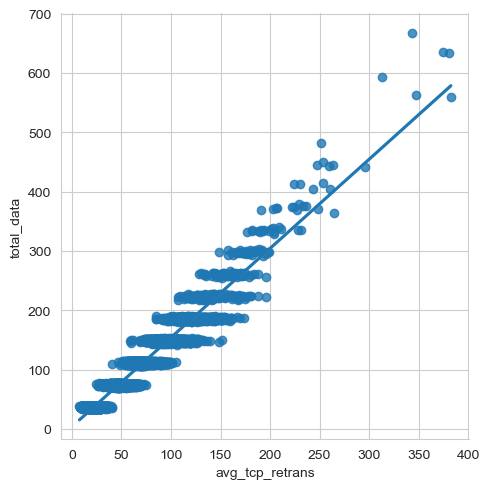

In [187]:
sns.set_style('whitegrid')
sns.lmplot(x='avg_tcp_retrans',y='total_data',data=agg_data,palette='coolwarm',aspect=1)

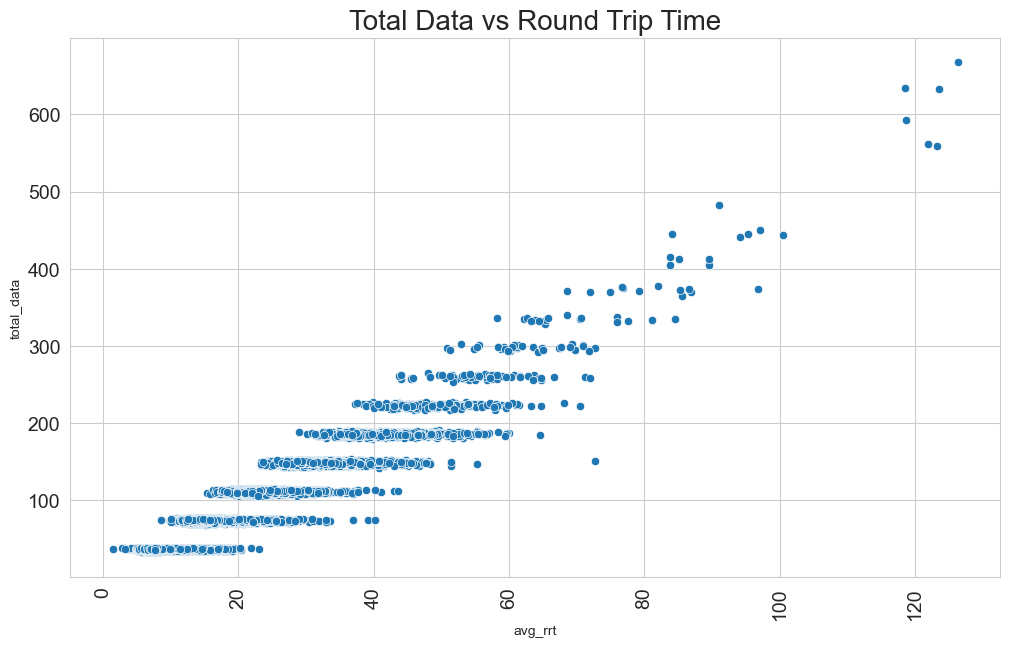

In [188]:
plot.plot_scatter(agg_data,x_col='avg_rrt',y_col='total_data',title='Total Data vs Round Trip Time',hue=None,style=None)

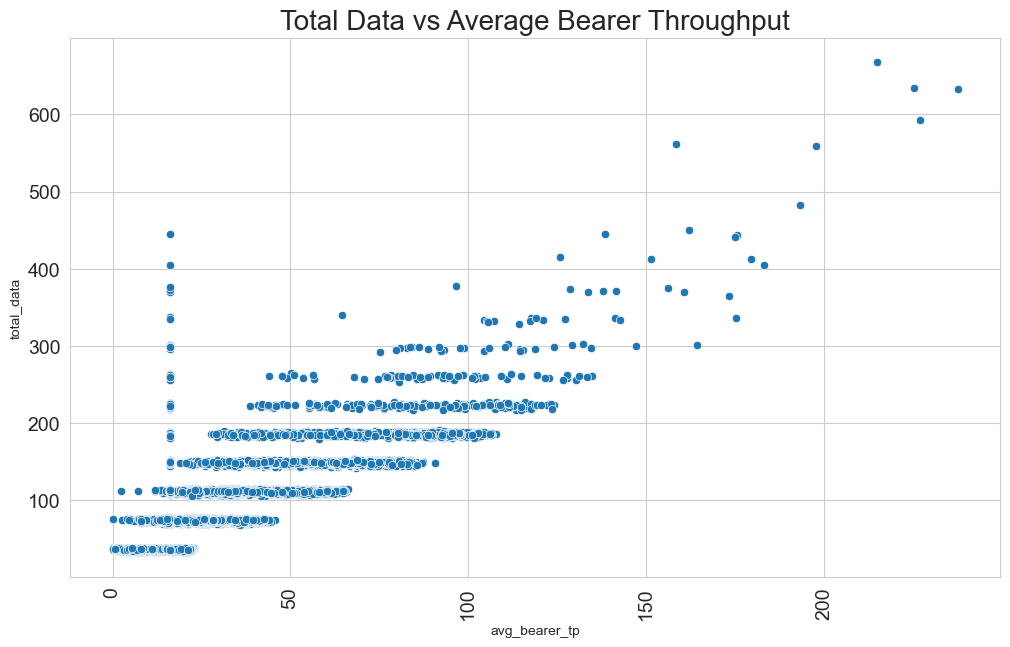

In [189]:
plot.plot_scatter(agg_data,x_col='avg_bearer_tp',y_col='total_data',title='Total Data vs Average Bearer Throughput',hue=None,style=None)

**10 of the Top, Bottom and Most Frequent Metrics** 

In [190]:
column_name = 'avg_rrt'

# Top 5 values
top_values = agg_data[column_name].nlargest(10)

# Bottom 5 values
bottom_values = agg_data[column_name].nsmallest(10)

# Most frequent 5 values
most_frequent_values = agg_data[column_name].value_counts().head(10)

rrt_result_table = pd.DataFrame({
    'Top Values': top_values.values,  # Access values to get a numpy array
    'Bottom Values': bottom_values.values,
    'Most Frequent Values': most_frequent_values.index.values,  # Access values to get a numpy array
    'Frequency': most_frequent_values.values
})
rrt_result_table


,Top Values,Bottom Values,Most Frequent Values,Frequency
0,126.357838,1.386294,7.613325,17411
1,123.502466,2.772589,6.664409,2025
2,123.302791,3.218876,15.226650,1986
3,121.913817,3.218876,6.591674,1840
4,118.713584,3.583519,7.052721,1608
5,118.524138,3.891820,7.110696,1430
6,100.528021,4.158883,7.221836,1419
7,97.125528,4.158883,7.275172,1394
8,96.754390,4.394449,6.734592,1339
9,95.365177,4.394449,7.167038,1335


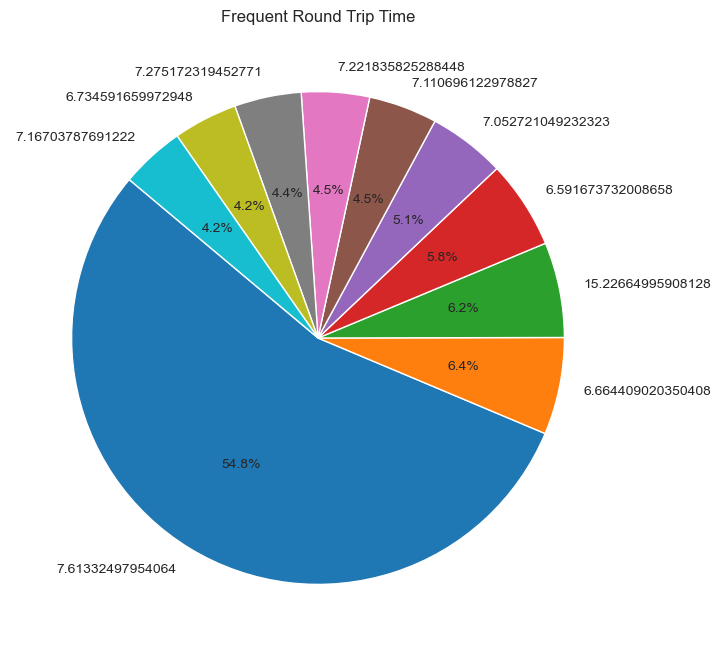

In [191]:
plot.plot_pie(rrt_result_table['Frequency'],title='Frequent Round Trip Time',label=rrt_result_table['Most Frequent Values'])

In [192]:
#Top 10 RTT Values in the dataset
column_name = 'avg_rrt'

# Top 5 values
top_values = agg_data[column_name].nlargest(10)

# Bottom 5 values
bottom_values = agg_data[column_name].nsmallest(10)

# Most frequent 5 values
most_frequent_values = agg_data[column_name].value_counts().head(10)

result_table = pd.DataFrame({
    'Top Values': top_values.values,  # Access values to get a numpy array
    'Bottom Values': bottom_values.values,
    'Most Frequent Values': most_frequent_values.index.values,  # Access values to get a numpy array
    'Frequency': most_frequent_values.values
})
result_table

,Top Values,Bottom Values,Most Frequent Values,Frequency
0,126.357838,1.386294,7.613325,17411
1,123.502466,2.772589,6.664409,2025
2,123.302791,3.218876,15.226650,1986
3,121.913817,3.218876,6.591674,1840
4,118.713584,3.583519,7.052721,1608
5,118.524138,3.891820,7.110696,1430
6,100.528021,4.158883,7.221836,1419
7,97.125528,4.158883,7.275172,1394
8,96.754390,4.394449,6.734592,1339
9,95.365177,4.394449,7.167038,1335


In [193]:
#Top 10 RTT Values in the dataset
column_name = 'avg_bearer_tp'

# Top 5 values
top_values = agg_data[column_name].nlargest(10)

# Bottom 5 values
bottom_values = agg_data[column_name].nsmallest(10)

# Most frequent 5 values
most_frequent_values = agg_data[column_name].value_counts().head(10)

result_table = pd.DataFrame({
    'Top Values': top_values.values,  # Access values to get a numpy array
    'Bottom Values': bottom_values.values,
    'Most Frequent Values': most_frequent_values.index.values,  # Access values to get a numpy array
    'Frequency': most_frequent_values.values
})
result_table

,Top Values,Bottom Values,Most Frequent Values,Frequency
0,237.571429,0.0,3.988984,2675
1,226.867050,0.0,6.824374,1769
2,225.170751,0.0,16.089721,1426
3,214.825542,0.0,6.919684,508
4,197.660258,0.0,7.611348,495
5,193.272792,0.0,8.045588,364
6,182.984794,0.0,7.634337,346
7,179.286246,0.0,7.977968,301
8,175.474978,0.0,7.587817,286
9,175.137771,0.0,7.124478,268


**Use Handset Manufacturer to evaluate metrics**

In [194]:
manufacturer_agg = df.groupby('handset_type').agg({'avg_tcp_retrans':'mean','avg_rrt':'mean','avg_bearer_tp':'mean', 'total_data':sum})

In [195]:
manufacturer_agg.reset_index(inplace=True)


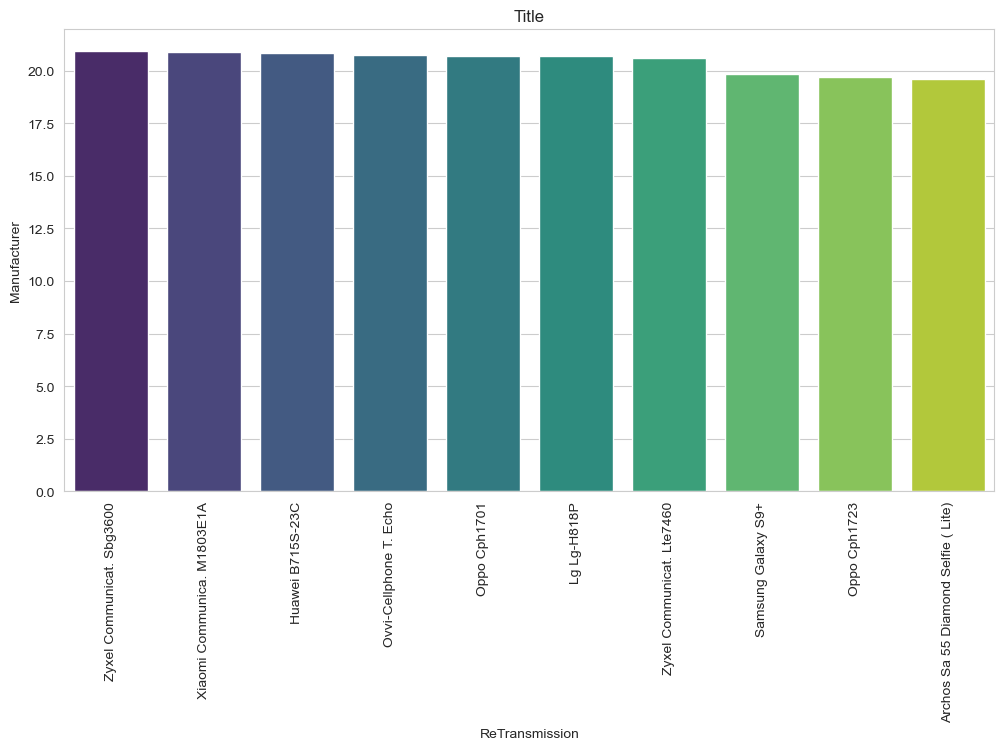

In [196]:
top_agg = manufacturer_agg.nlargest(10,columns='avg_bearer_tp')
plot.plot_bar(x=top_agg['handset_type'],y=top_agg['avg_bearer_tp'],xlabel='ReTransmission',ylabel='Manufacturer',title='Title')

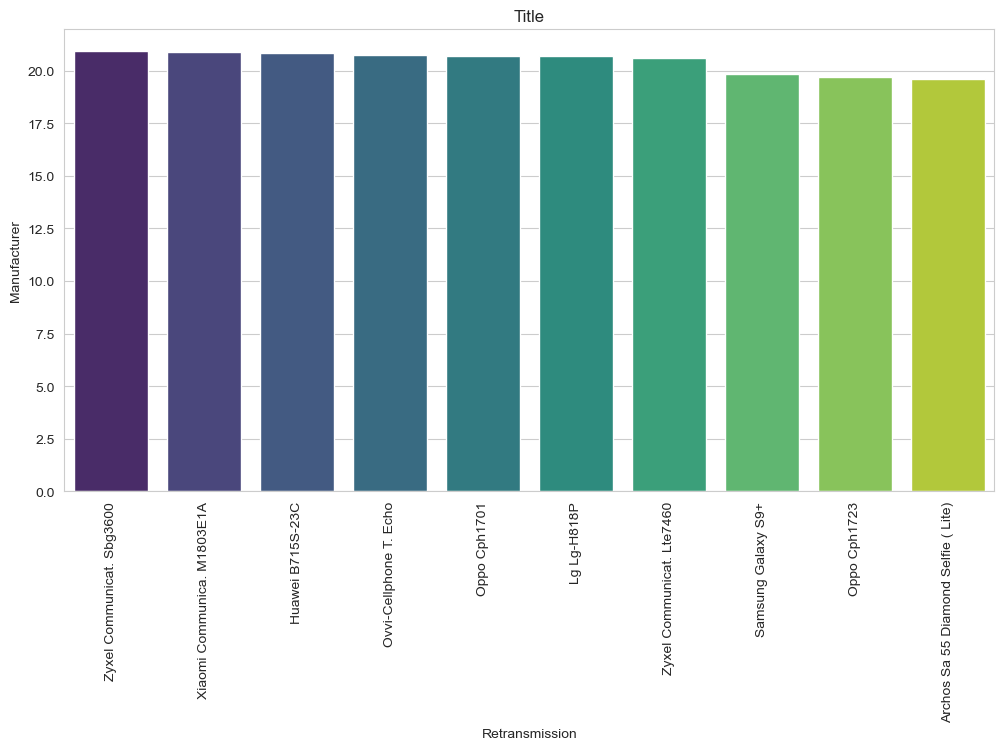

In [197]:
top_agg = manufacturer_agg.nlargest(10,columns='avg_bearer_tp')
plot.plot_bar(x=top_agg['handset_type'],y=top_agg['avg_bearer_tp'],xlabel='Retransmission',ylabel='Manufacturer',title='Title')

**K-Means Cluster Creating**

In [231]:
agg = np.array(agg_data)
len(agg[:, 0])

106855

In [198]:
from sklearn.cluster import KMeans

In [199]:
kmeans = KMeans(n_clusters=3)

In [210]:
kmeans.fit(agg)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [211]:
kmeans.cluster_centers_

array([[ 49.91691812,  16.75067745,  25.20686731,  80.71081015],
       [109.79858437,  37.72132126,  64.20722444, 171.19671857],
       [ 22.81181253,   7.95035075,  11.02033837,  37.20935242]])

In [212]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

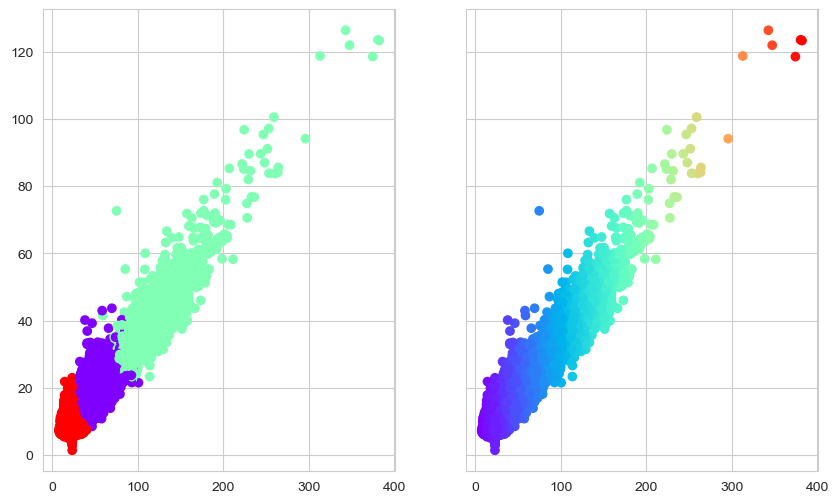

In [236]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

ax1.scatter(agg[:, 0],agg[:, 1] ,c=kmeans.labels_,cmap='rainbow')
ax2.scatter(agg[:, 0],agg[:, 1] ,c=agg[:,0],cmap='rainbow')
